# Myocardial Infraction Complications Analysis

## 0. Introduction

In [50]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [51]:
data = pd.read_csv("MI.data", header=None)
data.columns = ["ID", "AGE", "SEX", "INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "IBS_NASL", "GB", "SIM_GIPERT", "DLIT_AG", "ZSN_A", "nr_11", "nr_01", "nr_02", "nr_03", "nr_04", "nr_07", "nr_08", "np_01", "np_04", "np_05", "np_07", "np_08", "np_09", "np_10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "S_AD_KBRIG", "D_AD_KBRIG", "S_AD_ORIT", "D_AD_ORIT", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "K_BLOOD", "GIPER_NA", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "KFK_BLOOD", "L_BLOOD", "ROE", "TIME_B_S", "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n", "NOT_NA_2_n", "NOT_NA_3_n", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n", "FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"]
data.replace("?", np.NaN, inplace=True)
data = data.apply(pd.to_numeric, errors = "coerce")
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
related_time_features = ["R_AB_1_n","R_AB_2_n", "R_AB_3_n", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n", "NOT_NA_1_n","NOT_NA_2_n", "NOT_NA_3_n"]

## 1. Train-Validation-Test Split

In [53]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, 1:112]
X = X.drop(related_time_features, axis=1)
y = [data["ZSN"], data["FIBR_PREDS"], data["P_IM_STEN"], data["REC_IM"], data["OTEK_LANC"]]

X_train, X_val, X_test, y_train, y_val, y_test = [], [], [], [], [], []

# ! Caution
# i = 0 => ZSN or Chronic heart failure
# i = 1 => FIBR_PREDS or Atrial fibrillation
# i = 2 => P_IM_STEN or Post-infarction angina
# i = 3 => REC_IM or Relapse of the myocardial infarction
# i = 4 => OTEK_LANC or Pulmonary edema

for i in range(len(y)):
    # Separate train/test split for each target variable
    # Split the data into train and temporary sets
    X_train_i, X_temp_i, y_train_i, y_temp_i = train_test_split(X, y[i], train_size=0.7, random_state=0, shuffle = False)
    
    # Split the temporary set into validation and test sets
    X_val_i, X_test_i, y_val_i, y_test_i = train_test_split(X_temp_i, y_temp_i, train_size=0.5, random_state=0, shuffle = False)
    X_train.append(X_train_i)
    X_val.append(X_val_i)
    X_test.append(X_test_i)
    y_train.append(y_train_i)
    y_val.append(y_val_i)
    y_test.append(y_test_i)


In [54]:
# Check the number of samples in each set and print as a table
results = {"Set": ["Train", "Validation", "Test"]}
for i in range(len(y)):
    results[f"y{i}"] = [len(y_train[i]), len(y_val[i]), len(y_test[i])]
results = pd.DataFrame(results)
results

,Set,y0,y1,y2,y3,y4
0,Train,1190,1190,1190,1190,1190
1,Validation,255,255,255,255,255
2,Test,255,255,255,255,255


## 2. EDA

### Data Overview

In [55]:
data

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


### Target Balance Check

In [56]:
# The number of instances in the dataset
number_of_instances = len(data)
# Create a table to show the balance of each target variable
results = {"Target": [], "0": [], "1": []}
for i in range(len(y)):
    results["Target"].append(f"y{i}")
    results["0"].append(y[i].value_counts()[0] / number_of_instances)
    results["1"].append(y[i].value_counts()[1] / number_of_instances)
results = pd.DataFrame(results)
results

,Target,0,1
0,y0,0.768235,0.231765
1,y1,0.900000,0.100000
2,y2,0.912941,0.087059
3,y3,0.906471,0.093529
4,y4,0.906471,0.093529


### Check for missing values

In [57]:
# Create a table representing number of missing values of each feature, sort them descendingly
missing_values = X.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values, columns=["Number of Missing Values"])
missing_values


,Number of Missing Values
KFK_BLOOD,1696
IBS_NASL,1628
S_AD_KBRIG,1076
D_AD_KBRIG,1076
NOT_NA_KB,686
...,...
zab_leg_02,7
zab_leg_03,7
zab_leg_04,7
INF_ANAM,4


### Data Information of Feature

In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 102 entries, AGE to TRENT_S_n
dtypes: float64(101), int64(1)
memory usage: 1.3 MB


In [59]:
X.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1014.000000,1023.000000,1691.000000,1690.000000,1689.000000,1687.000000,1683.000000,1683.000000,1684.000000,1684.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.691321,0.387097,0.115316,0.283432,0.127294,0.666864,0.714795,0.743910,0.017815,0.202494
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.462176,0.487324,0.319498,0.450798,0.333401,0.471474,0.451646,0.436602,0.132317,0.401978
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
continuous_features = ["AGE", "S_AD_ORIT", "D_AD_ORIT", "K_BLOOD", "NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "L_BLOOD", "ROE"]
categorical_features = ["SEX" ,"INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "GB", "SIM_GIPERT", "DLIT_AG", "ZSN_A", "nr_11", "nr_01", "nr_02", "nr_03", "nr_04", "nr_07", "nr_08", "np_01", "np_04", "np_05", "np_07", "np_08", "np_09", "np_10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "GIPER_NA", "TIME_B_S", "NITR_S", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n"]

### Correlation Matrix


In [61]:
# plt.figure(figsize=(40, 30))
# sns.heatmap(X_train[0].corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 4})  # Adjust size as needed
# plt.savefig('heatmap.pdf', format='pdf')  # Save the plot as a PDF file
# plt.show()

## 3. Preprocessing

In [62]:
%store X_train
X_train[0]

Stored 'X_train' (list)


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_KB,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,NaN,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,NaN,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,78.0,1,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1186,59.0,1,1.0,3.0,2.0,1.0,NaN,2.0,0.0,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1187,69.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1188,53.0,1,0.0,0.0,0.0,0.0,NaN,2.0,0.0,NaN,...,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.columns_to_drop = None
        self.threshold = threshold

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.columns_to_drop = X.columns[X.isnull().sum() > self.threshold]
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        global X_keep 
        X_keep = list(X.columns[~X.columns.isin(self.columns_to_drop)])
        return X.drop(columns=self.columns_to_drop)
    

class RowDropper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.rows_to_drop = None
        self.threshold = threshold

    def fit(self, X, y=None):
        self.rows_to_drop = X.index[X.isnull().sum(axis=1) > self.threshold]
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        return X.drop(index=self.rows_to_drop)
    

In [64]:
binary_features = ["SEX", "IBS_NASL", "SIM_GIPERT", "nr_11", "nr_01", "nr_02", "nr_03", "nr_04", "nr_07", "nr_08", "np_01", "np_04", "np_05", "np_07", "np_08", "np_09", "np_10", "endocr_01", "endocr_02", "endcor_03", "zab_leg_01", "zab_leg_02", "zab_leg_03", "zab_leg_04", "zab_leg_06", "O_L_POST", "K_SH_POST", "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "IM_PG_P", "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08", "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08", "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06", "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01", "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "GIPER_NA", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n", "TRENT_S_n"]

In [65]:

# Define outliers handler class
class OutliersHandler(BaseEstimator, TransformerMixin):
    def __init__(self, coefficient):
        self.coefficient = coefficient
        self.lower_bounds = None
        self.upper_bounds = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bounds = q1 - iqr * self.coefficient
        self.upper_bounds = q3 + iqr * self.coefficient
        return self

    def transform(self, X):
        # Ensure the input is a DataFrame
        X = pd.DataFrame(X)
        for feature in X.columns:
            if feature in continuous_features: # if feature is continuous, because clipping in the other one will probably result in missing information
                X[feature] = X[feature].clip(self.lower_bounds[feature], self.upper_bounds[feature])
        return X

In [66]:
def impute_by_type(X, continuous_features, categorical_features):
    """Fills missing values based on data type, handling potential errors, works with subsets"""
    for feature in categorical_features:
        if feature in X.columns:
            try:
                X[feature].fillna(X[feature].mode()[0], inplace=True)
            except KeyError:
                pass
    for feature in continuous_features:
        if feature in X.columns:
            try:
                X[feature].fillna(X[feature].mean(axis=0), inplace=True)
            except KeyError:
                pass
    return X

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

# Define dropper pipeline
dropper = Pipeline(steps=[
    ('column_dropper', ColumnDropper(threshold=100)),
    ('row_dropper', RowDropper(threshold=100))
])

# Define preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('dropper', dropper),
    ('outliers_clipper',OutliersHandler(coefficient=1.5)),
    ('imputation', FunctionTransformer(impute_by_type, kw_args={"continuous_features":continuous_features, "categorical_features":categorical_features })),  # Fill missing values using mean
    ('scaling', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

# Apply the preprocessing pipeline to each set
for i in range(len(y)):
    X_train[i] = preprocessing_pipeline.fit_transform(X_train[i])
    X_val[i] = preprocessing_pipeline.transform(X_val[i])
    X_test[i] = preprocessing_pipeline.transform(X_test[i])

preprocessed_data = pd.DataFrame(data=X_train[0], columns=X_keep)
%store preprocessed_data
preprocessed_data

Stored 'preprocessed_data' (DataFrame)


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,ZSN_A,nr_11,...,L_BLOOD,TIME_B_S,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,1.496141,0.708890,1.826012,-0.411275,-0.122760,1.080799,1.520508,-0.184075,-0.292017,-0.171499,...,-0.153281,-0.252893,-0.264847,1.600898,-0.404036,-1.584400,0.633758,0.537842,-0.14649,-0.526141
1,-0.475808,0.708890,0.599740,-0.836485,-1.077563,-1.383091,-1.256072,-0.184075,-0.292017,-0.171499,...,-0.223491,-0.936854,-0.264847,1.600898,-0.404036,0.631154,0.633758,0.537842,-0.14649,1.900632
2,-0.744710,0.708890,-0.626533,-0.836485,-1.077563,1.080799,0.594981,-0.184075,-0.292017,-0.171499,...,0.829651,-0.594873,-0.264847,1.600898,2.475025,-1.584400,0.633758,0.537842,-0.14649,-0.526141
3,0.689435,-1.410656,-0.626533,-0.836485,-1.077563,1.080799,0.594981,-0.184075,1.576264,-0.171499,...,0.000000,-0.936854,-0.264847,-0.624649,-0.404036,0.631154,0.633758,0.537842,-0.14649,-0.526141
4,-0.027638,0.708890,-0.626533,-0.836485,-1.077563,1.080799,1.520508,-0.184075,-0.292017,-0.171499,...,-0.047967,1.457008,-0.264847,-0.624649,-0.404036,0.631154,-1.577890,0.537842,-0.14649,1.900632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,1.585775,0.708890,-0.626533,-0.836485,-1.077563,-1.383091,-1.256072,-0.184075,-0.292017,-0.171499,...,-0.083072,-0.594873,-0.264847,-0.624649,-0.404036,0.631154,-1.577890,0.537842,-0.14649,-0.526141
1186,-0.117272,0.708890,0.599740,0.439146,0.832042,-0.151146,0.594981,-0.184075,-0.292017,-0.171499,...,0.127557,-0.936854,-0.264847,1.600898,2.475025,-1.584400,0.633758,0.537842,-0.14649,-0.526141
1187,0.779069,-1.410656,-0.626533,1.714776,0.832042,-0.151146,0.594981,-0.184075,-0.292017,-0.171499,...,1.180698,0.773048,-0.264847,-0.624649,-0.404036,0.631154,-1.577890,0.537842,-0.14649,-0.526141
1188,-0.655076,0.708890,-0.626533,-0.836485,-1.077563,-1.383091,0.594981,-0.184075,-0.292017,-0.171499,...,2.584887,1.457008,-0.264847,1.600898,-0.404036,0.631154,-1.577890,0.537842,-0.14649,-0.526141


## 4. Model Selection

In [68]:
# write a section using Cost Sensitive Decision Tree and print the results as a table. A table includes several rows representing each of a metrics for imbalanced data. Each colummn represents each target variable.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model
model = DecisionTreeClassifier(random_state=0, class_weight='balanced')

# Train the model for each target variable
results = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score"]}
for i in range(len(y)):
    model.fit(X_train[i], y_train[i])
    y_pred = model.predict(X_val[i])
    results[f"y{i}"] = [accuracy_score(y_val[i], y_pred), precision_score(y_val[i], y_pred), recall_score(y_val[i], y_pred), f1_score(y_val[i], y_pred)]

results = pd.DataFrame(results)
# Change y0,y1,y2,y3,y4 to ZSN, FIBR_PREDS, P_IM_STEN, REC_IM, OTEK_LANC
results.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

results

,Metric,ZSN,FIBR_PREDS,P_IM_STEN,REC_IM,OTEK_LANC
0,Accuracy,0.658824,0.717647,0.65098,0.733333,0.733333
1,Precision,0.293333,0.433333,0.00000,0.090909,0.365854
2,Recall,0.392857,0.191176,0.00000,0.040000,0.263158
3,F1 Score,0.335878,0.265306,0.00000,0.055556,0.306122


## 5. Hyperparameter Tuning

In [69]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

#### SMOTE

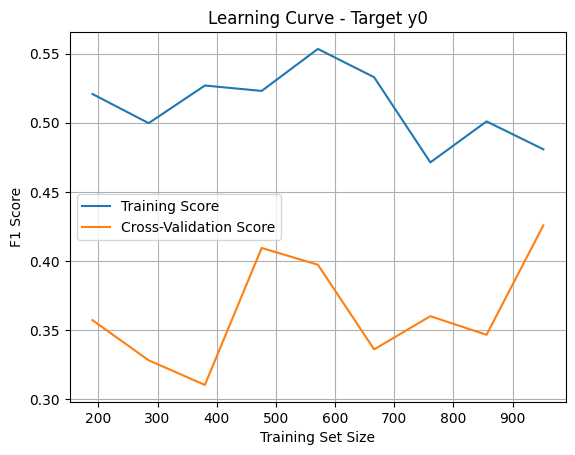

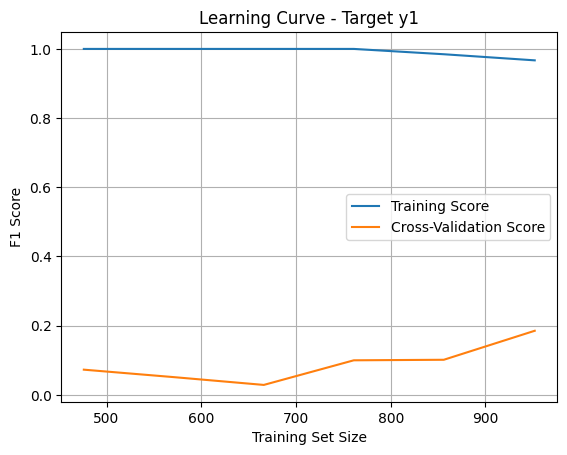

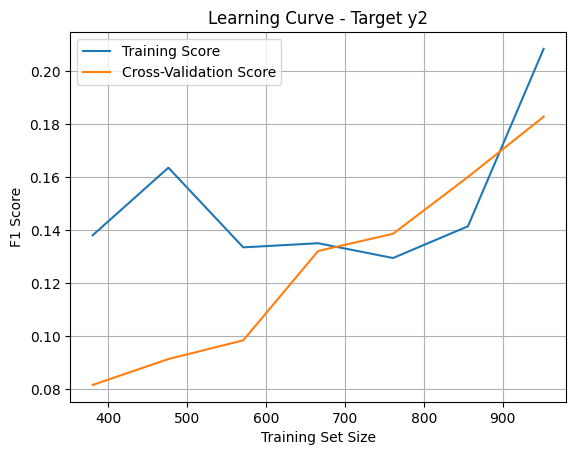

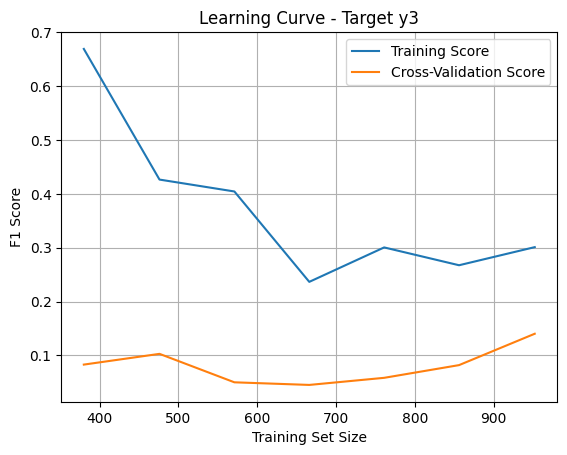

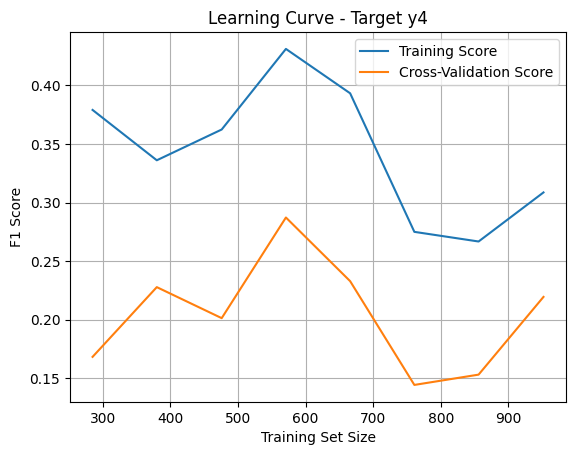

In [70]:
# Confusion matrix
val_SMOTE_balanced_conf = {"Metric": ["TN", "FP", "FN", "TP"]}
test_SMOTE_balanced_conf = {"Metric": ["TN", "FP", "FN", "TP"]}

# Define the pipeline
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=0)),
    ('model', DecisionTreeClassifier(random_state=0, class_weight='balanced'))
])
# Post-pruning
# path = DecisionTreeClassifier(random_state=0, class_weight={0: 1, 1: 3}).cost_complexity_pruning_path(X_train[0], y_train[0])
# ccp_alphas, impurities = path.ccp_alphas, path.impurities
# candidate_alphas = ccp_alphas[::10]

# Define the hyperparameters
param_grid = {
    'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'model__max_depth': [5, 10, 15, 20],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    # 'model__min_samples_split': [2, 5, 10],
    # 'model__ccp_alpha': candidate_alphas,
}

# Define the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Tables
val_SMOTE_balanced = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"]}
test_SMOTE_balanced = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"]}

for i in range(len(y)):
    # pipeline.set_params(model__class_weight=weights[i])
    grid_search.fit(X_train[i], y_train[i])
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val[i])
    
    # Val metrics table
    val_SMOTE_balanced[f"y{i}"] = [
        accuracy_score(y_val[i], y_pred), 
        precision_score(y_val[i], y_pred), 
        recall_score(y_val[i], y_pred), 
        f1_score(y_val[i], y_pred),
        roc_auc_score(y_val[i], y_pred),
        geometric_mean_score(y_val[i], y_pred)
    ]
    
    # Val confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_val[i], y_pred).ravel()
    val_SMOTE_balanced_conf[f"y{i}"] = [tn, fp, fn, tp]
    
    # Learning curve graph
    train_sizes, train_scores, test_scores = learning_curve(best_model, X_train[i], y_train[i], cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
    plt.ylabel('F1 Score')
    plt.xlabel('Training Set Size')
    plt.title('Learning Curve - Target y{}'.format(i))
    plt.legend()
    plt.grid(True)
    plt.show()

    # print("========================================") # print the best hyperparameters for the current target
    # print(f"Hyperparameters for y{i}")
    # for name, param in grid_search.best_estimator_.get_params().items():
    #     print(f"{name}: {param}")
    
    y_pred = best_model.predict(X_test[i])
    
    # Test metrics table
    test_SMOTE_balanced[f"y{i}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred),
        geometric_mean_score(y_test[i], y_pred)
    ]
    
    # Test confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    test_SMOTE_balanced_conf[f"y{i}"] = [tn, fp, fn, tp]
    
# Validate
val_SMOTE_balanced = pd.DataFrame(val_SMOTE_balanced)
val_SMOTE_balanced.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Test
test_SMOTE_balanced = pd.DataFrame(test_SMOTE_balanced)
test_SMOTE_balanced.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Confusion matrix
val_SMOTE_balanced_conf = pd.DataFrame(val_SMOTE_balanced_conf)
val_SMOTE_balanced_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]
test_SMOTE_balanced_conf = pd.DataFrame(test_SMOTE_balanced_conf)
test_SMOTE_balanced_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

#### Cost-sensitive Decision Tree

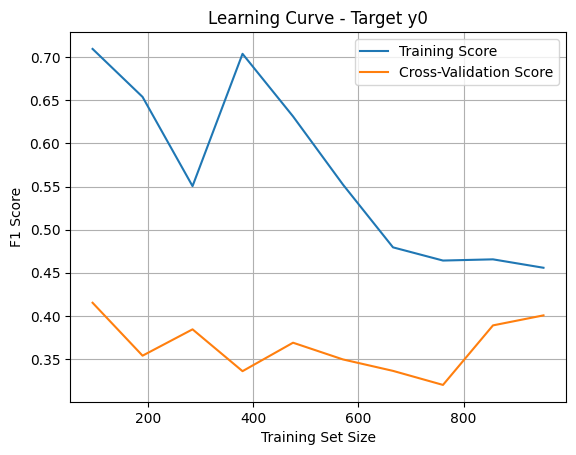

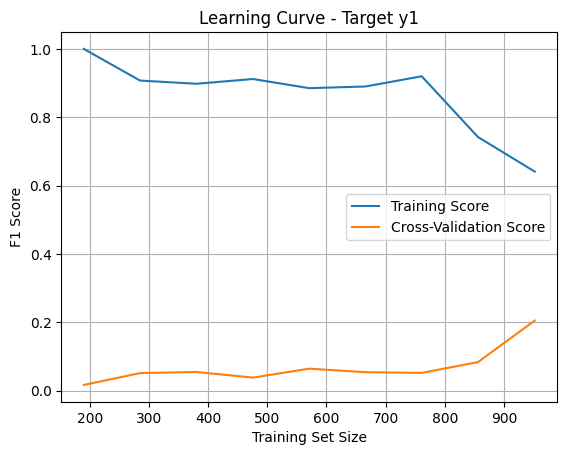

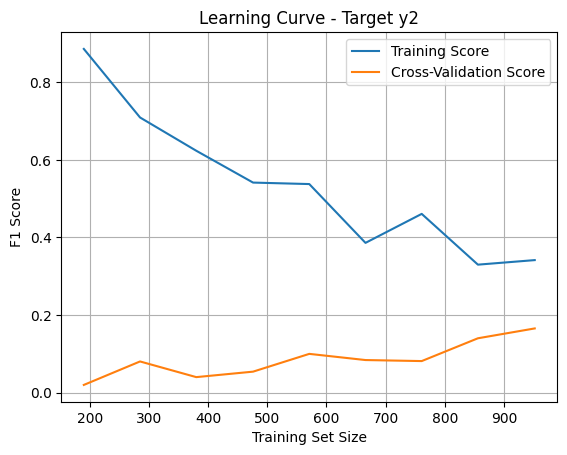

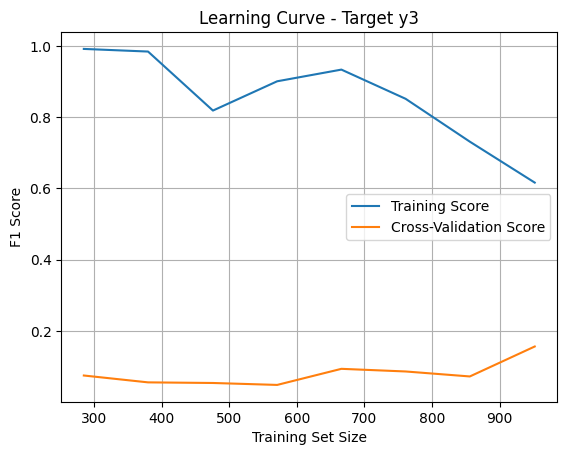

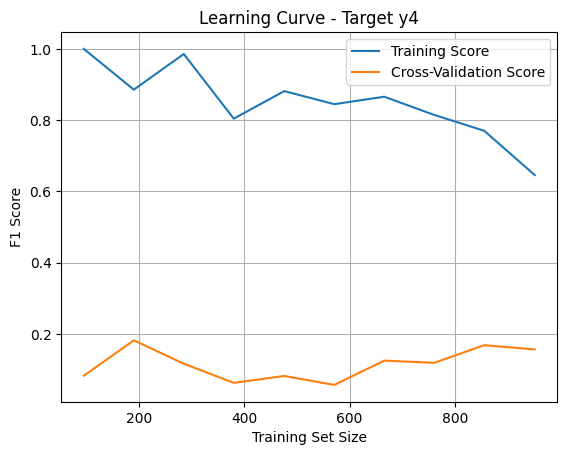

In [71]:
# Confusion matrix
val_cost_sensitive_conf = {"Metric": ["TN", "FP", "FN", "TP"]}
test_cost_sensitive_conf = {"Metric": ["TN", "FP", "FN", "TP"]}

# Define the pipeline
pipeline = Pipeline(steps=[
    ('model', DecisionTreeClassifier(random_state=0))
])

# Define class weights
class_weights_zsn = {0: 1, 1: y[0].value_counts()[0] / y[0].value_counts()[1]}
class_weights_fibr_preds = {0: 1, 1: y[1].value_counts()[0] / y[1].value_counts()[1]}
class_weights_p_im_sten = {0: 1, 1: y[2].value_counts()[0] / y[2].value_counts()[1]}
class_weights_rec_im = {0: 1, 1: y[3].value_counts()[0] / y[3].value_counts()[1]}
class_weights_otek_lanc = {0: 1, 1: y[4].value_counts()[0] / y[4].value_counts()[1]}
weights = [class_weights_zsn, class_weights_fibr_preds, class_weights_p_im_sten, class_weights_rec_im, class_weights_otek_lanc]

# Post-pruning
# path = DecisionTreeClassifier(random_state=0, class_weight={0: 1, 1: 3}).cost_complexity_pruning_path(X_train[0], y_train[0])
# ccp_alphas, impurities = path.ccp_alphas, path.impurities
# candidate_alphas = ccp_alphas[::10]

# Define the hyperparameters
param_grid = {
    'model__max_depth': [5, 10, 15, 20],
    # 'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    # 'model__ccp_alpha': candidate_alphas,
}

# Define the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Tables
val_cost_sensitive = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"]}
test_cost_sensitive = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"]}

for i in range(len(y)):
    pipeline.set_params(model__class_weight=weights[i]) # Adding weights to the current model
    grid_search.fit(X_train[i], y_train[i])
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val[i])
    
    # Val metrics table
    val_cost_sensitive[f"y{i}"] = [
        accuracy_score(y_val[i], y_pred),
        precision_score(y_val[i], y_pred),
        recall_score(y_val[i], y_pred),
        f1_score(y_val[i], y_pred),
        roc_auc_score(y_val[i], y_pred),
        geometric_mean_score(y_val[i], y_pred)
    ]
    
    # Val confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_val[i], y_pred).ravel()
    val_cost_sensitive_conf[f"y{i}"] = [tn, fp, fn, tp]
    
    # Learning curve graph
    train_sizes, train_scores, test_scores = learning_curve(best_model, X_train[i], y_train[i], cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
    plt.ylabel('F1 Score')
    plt.xlabel('Training Set Size')
    plt.title('Learning Curve - Target y{}'.format(i))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # print("========================================") # print the best hyperparameters for the current target
    # print(f"Hyperparameters for y{i}")
    # for name, param in grid_search.best_estimator_.get_params().items():
    #     print(f"{name}: {param}")
    
    y_pred = best_model.predict(X_test[i])
    
    # Test metrics table
    test_cost_sensitive[f"y{i}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred),
        geometric_mean_score(y_test[i], y_pred)
    ]
    
    # Test confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    test_cost_sensitive_conf[f"y{i}"] = [tn, fp, fn, tp]
    
# Validate
val_cost_sensitive = pd.DataFrame(val_cost_sensitive)
val_cost_sensitive.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Test
test_cost_sensitive = pd.DataFrame(test_cost_sensitive)
test_cost_sensitive.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Confusion matrix
val_cost_sensitive_conf = pd.DataFrame(val_cost_sensitive_conf)
val_cost_sensitive_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]
test_cost_sensitive_conf = pd.DataFrame(test_cost_sensitive_conf)
test_cost_sensitive_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

### Cost-sensitive + SMOTE

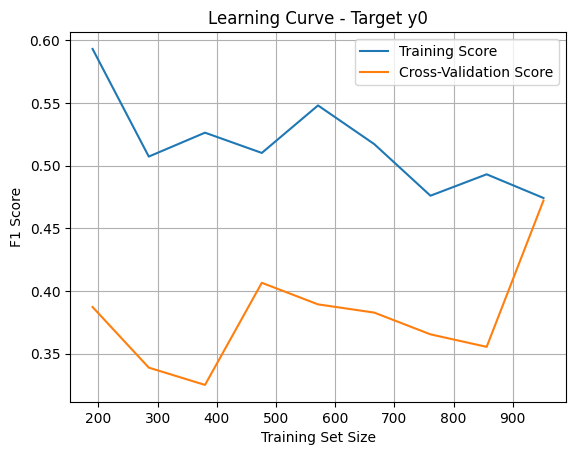

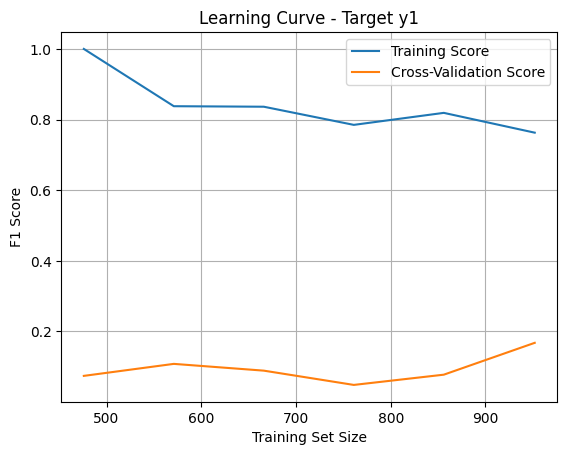

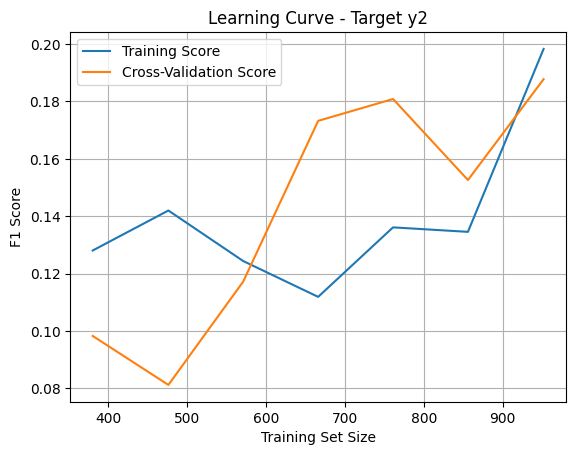

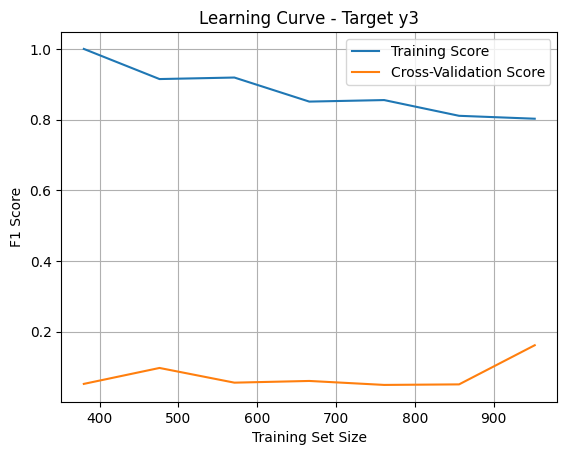

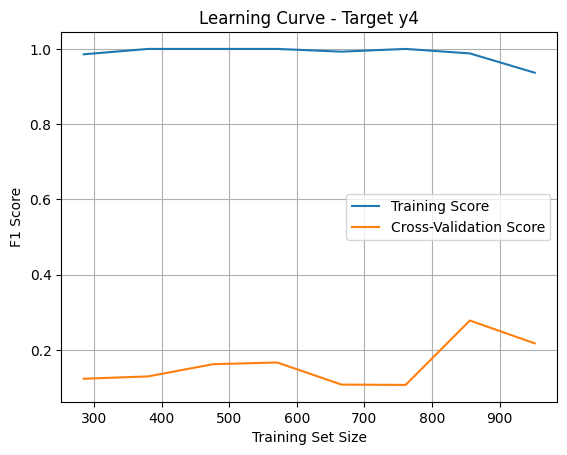

In [72]:
# Confusion matrix
val_SMOTE_cost_sensitive_conf = {"Metric": ["TN", "FP", "FN", "TP"]}
test_SMOTE_cost_sensitive_conf = {"Metric": ["TN", "FP", "FN", "TP"]}

# Define the pipeline
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=0)),
    ('model', DecisionTreeClassifier(random_state=0))
])


# Post-pruning
# path = DecisionTreeClassifier(random_state=0, class_weight={0: 1, 1: 3}).cost_complexity_pruning_path(X_train[0], y_train[0])
# ccp_alphas, impurities = path.ccp_alphas, path.impurities
# candidate_alphas = ccp_alphas[::10]

# Define the hyperparameters
param_grid = {
    'smote__sampling_strategy': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
    'model__max_depth': [5, 10, 15, 20],
    # 'model__min_samples_split': [2, 5, 10],
    'model__class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}, {0: 1, 1: 6}],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    # 'model__ccp_alpha': candidate_alphas,
}

# Define the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

# Tables
val_SMOTE_cost_sensitive = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"]}
test_SMOTE_cost_sensitive = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"]}

for i in range(len(y)):
    grid_search.fit(X_train[i], y_train[i])
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val[i])
    
    # Val metrics table
    val_SMOTE_cost_sensitive[f"y{i}"] = [
        accuracy_score(y_val[i], y_pred),
        precision_score(y_val[i], y_pred),
        recall_score(y_val[i], y_pred),
        f1_score(y_val[i], y_pred),
        roc_auc_score(y_val[i], y_pred),
        geometric_mean_score(y_val[i], y_pred)
    ]
    
    # Val confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_val[i], y_pred).ravel()
    val_SMOTE_cost_sensitive_conf[f"y{i}"] = [tn, fp, fn, tp]
    
    # Learning curve graph
    train_sizes, train_scores, test_scores = learning_curve(best_model, X_train[i], y_train[i], cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
    plt.ylabel('F1 Score')
    plt.xlabel('Training Set Size')
    plt.title('Learning Curve - Target y{}'.format(i))
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # print("========================================") # print the best hyperparameters for the current target
    # print(f"Hyperparameters for y{i}")
    # for name, param in grid_search.best_estimator_.get_params().items():
    #     print(f"{name}: {param}")
    
    y_pred = best_model.predict(X_test[i])
    
    # Test metrics table
    test_SMOTE_cost_sensitive[f"y{i}"] = [
        accuracy_score(y_test[i], y_pred),
        precision_score(y_test[i], y_pred),
        recall_score(y_test[i], y_pred),
        f1_score(y_test[i], y_pred),
        roc_auc_score(y_test[i], y_pred),
        geometric_mean_score(y_test[i], y_pred)
    ]
    
    # Test confusion matrix showing TP TN FN FP
    tn, fp, fn, tp = confusion_matrix(y_test[i], y_pred).ravel()
    test_SMOTE_cost_sensitive_conf[f"y{i}"] = [tn, fp, fn, tp]
    
# Validate      
val_SMOTE_cost_sensitive = pd.DataFrame(val_SMOTE_cost_sensitive)
val_SMOTE_cost_sensitive.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Test
test_SMOTE_cost_sensitive = pd.DataFrame(test_SMOTE_cost_sensitive)
test_SMOTE_cost_sensitive.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

# Confusion matrix
val_SMOTE_cost_sensitive_conf = pd.DataFrame(val_SMOTE_cost_sensitive_conf)
val_SMOTE_cost_sensitive_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]
test_SMOTE_cost_sensitive_conf = pd.DataFrame(test_SMOTE_cost_sensitive_conf)
test_SMOTE_cost_sensitive_conf.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]

### Random Forest

In [73]:
# # Define the pipeline
# from sklearn.ensemble import RandomForestClassifier
# pipeline = Pipeline(steps=[
#     ('smote', SMOTE(random_state=0)),
#     ('model', RandomForestClassifier(random_state=0))
# ])
# 
# # Define the hyperparameters
# param_grid = {
#     'smote__sampling_strategy': [0.5, 0.6, 0.7],
#     'model__max_depth': [5, 10, 15, 20],
#     'model__min_samples_split': [2, 5, 10],
#     'model__n_estimators': [5, 10, 15],
# }
# 
# # Define the grid search
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')
# 
# # Train the model for all target variables and print the results as a table. A table includes several rows representing each of a metrics for imbalanced data. Each colummn represents each target variable.
# results_random_forest = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"]}
# for i in range(len(y)):
#     pipeline.set_params(model__class_weight=weights[i])
#     grid_search.fit(X_train[i], y_train[i])
#     y_pred = grid_search.predict(X_val[i])
#     results_random_forest[f"y{i}"] = [
#         accuracy_score(y_val[i], y_pred), 
#         precision_score(y_val[i], y_pred), 
#         recall_score(y_val[i], y_pred), 
#         f1_score(y_val[i], y_pred),
#         roc_auc_score(y_val[i], y_pred),
#         geometric_mean_score(y_val[i], y_pred)
#     ]
#     print("========================================") # print the best hyperparameters for the current target
#     print(f"Hyperparameters for y{i}")
#     for name, param in grid_search.best_estimator_.get_params().items():
#         print(f"{name}: {param}")
# 
# results_random_forest = pd.DataFrame(results_random_forest)
# 
# # Change y0,y1,y2,y3,y4 to ZSN, FIBR_PREDS, P_IM_STEN, REC_IM, OTEK_LANC
# results_random_forest.columns = ["Metric", "ZSN", "FIBR_PREDS", "P_IM_STEN", "REC_IM", "OTEK_LANC"]
# 
# results_random_forest

## Validation

### ZSN

In [74]:
# Create a table to compare multiple metrics: accuracy, precision, recall, f1 score, roc auc, g mean of multiple classifiers for target ZSN
val_zsn = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
               "Decision Tree: SMOTE": val_SMOTE_balanced["ZSN"],
               "Decision Tree: Cost-sensitive": val_cost_sensitive["ZSN"],
               "Decision Tree: SMOTE + Cost-sensitive": val_SMOTE_cost_sensitive["ZSN"]}
val_zsn = pd.DataFrame(val_zsn)
val_zsn.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

val_zsn

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.517647,0.627451,0.517647
1,Precision,0.227642,0.265060,0.227642
2,Recall,0.500000,0.392857,0.500000
3,F1 Score,0.312849,0.316547,0.312849
4,ROC AUC,0.511307,0.543162,0.511307
5,G mean,0.511182,0.521952,0.511182


In [75]:
# Confusion matrix
val_SMOTE_balanced_conf["ZSN"]

0    104
1     95
2     28
3     28
Name: ZSN, dtype: int64

### FIBR_PREDS

In [76]:
val_fibr_preds = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
               "Decision Tree: SMOTE": val_SMOTE_balanced["FIBR_PREDS"],
               "Decision Tree: Cost-sensitive": val_cost_sensitive["FIBR_PREDS"],
               "Decision Tree: SMOTE + Cost-sensitive": val_SMOTE_cost_sensitive["FIBR_PREDS"]}
val_fibr_preds = pd.DataFrame(val_fibr_preds)
val_fibr_preds.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

val_fibr_preds

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.682353,0.678431,0.721569
1,Precision,0.259259,0.325000,0.459459
2,Recall,0.102941,0.191176,0.250000
3,F1 Score,0.147368,0.240741,0.323810
4,ROC AUC,0.497995,0.523396,0.571524
5,G mean,0.303202,0.404442,0.472506


In [77]:
# Confusion matrix
val_SMOTE_balanced_conf["FIBR_PREDS"]

0    167
1     20
2     61
3      7
Name: FIBR_PREDS, dtype: int64

### P_IM_STEN

In [78]:
val_p_im_sten = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
                      "Decision Tree: SMOTE": val_SMOTE_balanced["P_IM_STEN"],
                      "Decision Tree: Cost-sensitive": val_cost_sensitive["P_IM_STEN"],
                      "Decision Tree: SMOTE + Cost-sensitive": val_SMOTE_cost_sensitive["P_IM_STEN"]}
val_p_im_sten = pd.DataFrame(val_p_im_sten)
val_p_im_sten.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

val_p_im_sten

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.556863,0.517647,0.588235
1,Precision,0.320312,0.294118,0.349206
2,Recall,0.611940,0.597015,0.656716
3,F1 Score,0.420513,0.394089,0.455959
4,ROC AUC,0.574587,0.543188,0.610273
5,G mean,0.573372,0.540515,0.608503


In [79]:
# Confusion matrix
val_SMOTE_balanced_conf["P_IM_STEN"]

0    101
1     87
2     26
3     41
Name: P_IM_STEN, dtype: int64

### REC_IM

In [80]:
val_rec_im = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
                      "Decision Tree: SMOTE": val_SMOTE_balanced["REC_IM"],
                      "Decision Tree: Cost-sensitive": val_cost_sensitive["REC_IM"],
                      "Decision Tree: SMOTE + Cost-sensitive": val_SMOTE_cost_sensitive["REC_IM"]}
val_rec_im = pd.DataFrame(val_rec_im)
val_rec_im.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

val_rec_im

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.639216,0.745098,0.729412
1,Precision,0.171875,0.307692,0.172414
2,Recall,0.220000,0.240000,0.100000
3,F1 Score,0.192982,0.269663,0.126582
4,ROC AUC,0.480732,0.554146,0.491463
5,G mean,0.403884,0.456498,0.297141


In [81]:
# Confusion matrix
val_SMOTE_balanced_conf["REC_IM"]

0    152
1     53
2     39
3     11
Name: REC_IM, dtype: int64

### OTEK_LANC

In [82]:
val_otek_lanc = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
                      "Decision Tree: SMOTE": val_SMOTE_balanced["OTEK_LANC"],
                      "Decision Tree: Cost-sensitive": val_cost_sensitive["OTEK_LANC"],
                      "Decision Tree: SMOTE + Cost-sensitive": val_SMOTE_cost_sensitive["OTEK_LANC"]}
val_otek_lanc = pd.DataFrame(val_otek_lanc)
val_otek_lanc.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

val_otek_lanc

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.698039,0.713725,0.749020
1,Precision,0.272727,0.233333,0.405405
2,Recall,0.210526,0.122807,0.263158
3,F1 Score,0.237624,0.160920,0.319149
4,ROC AUC,0.524455,0.503323,0.576023
5,G mean,0.420121,0.329456,0.483651


In [83]:
# Confusion matrix
val_SMOTE_balanced_conf["OTEK_LANC"]

0    166
1     32
2     45
3     12
Name: OTEK_LANC, dtype: int64

## 6. Model Evaluation

### ZSN

In [84]:
# Decision Tree: SMOTE
test_zsn = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
               "Decision Tree: SMOTE": test_SMOTE_balanced["ZSN"],
               "Decision Tree: Cost-sensitive": test_cost_sensitive["ZSN"],
               "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["ZSN"]}
test_zsn = pd.DataFrame(test_zsn)
test_zsn.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

test_zsn

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.400000,0.521569,0.400000
1,Precision,0.177778,0.142857,0.177778
2,Recall,0.864865,0.459459,0.864865
3,F1 Score,0.294931,0.217949,0.294931
4,ROC AUC,0.592983,0.495785,0.592983
5,G mean,0.526981,0.494452,0.526981


In [85]:
# Confusion matrix
test_SMOTE_balanced_conf["ZSN"]

0     70
1    148
2      5
3     32
Name: ZSN, dtype: int64

### FIBR_PREDS

In [86]:
test_fibr_preds = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
                    "Decision Tree: SMOTE": test_SMOTE_balanced["FIBR_PREDS"],
                    "Decision Tree: Cost-sensitive": test_cost_sensitive["FIBR_PREDS"],
                    "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["FIBR_PREDS"]}
test_fibr_preds = pd.DataFrame(test_fibr_preds)
test_fibr_preds.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

test_fibr_preds

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.749020,0.709804,0.784314
1,Precision,0.073171,0.142857,0.093750
2,Recall,0.103448,0.310345,0.103448
3,F1 Score,0.085714,0.195652,0.098361
4,ROC AUC,0.467653,0.535703,0.487565
5,G mean,0.293350,0.485996,0.300290


In [87]:
# Confusion matrix
test_SMOTE_balanced_conf["FIBR_PREDS"]

0    188
1     38
2     26
3      3
Name: FIBR_PREDS, dtype: int64

### P_IM_STEN

In [88]:
test_p_im_sten = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
                    "Decision Tree: SMOTE": test_SMOTE_balanced["P_IM_STEN"],
                    "Decision Tree: Cost-sensitive": test_cost_sensitive["P_IM_STEN"],
                    "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["P_IM_STEN"]}
test_p_im_sten = pd.DataFrame(test_p_im_sten)
test_p_im_sten.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

test_p_im_sten

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.482353,0.588235,0.423529
1,Precision,0.000000,0.000000,0.000000
2,Recall,0.000000,0.000000,0.000000
3,F1 Score,0.000000,0.000000,0.000000
4,ROC AUC,0.242126,0.295276,0.212598
5,G mean,0.000000,0.000000,0.000000


In [89]:
# Confusion matrix
test_SMOTE_balanced_conf["P_IM_STEN"]

0    123
1    131
2      1
3      0
Name: P_IM_STEN, dtype: int64

### REC_IM

In [90]:
test_rec_im = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
                    "Decision Tree: SMOTE": test_SMOTE_balanced["REC_IM"],
                    "Decision Tree: Cost-sensitive": test_cost_sensitive["REC_IM"],
                    "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["REC_IM"]}
test_rec_im = pd.DataFrame(test_rec_im)
test_rec_im.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

test_rec_im

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.592157,0.764706,0.721569
1,Precision,0.189474,0.297297,0.190476
2,Recall,0.400000,0.244444,0.177778
3,F1 Score,0.257143,0.268293,0.183908
4,ROC AUC,0.516667,0.560317,0.507937
5,G mean,0.503322,0.462796,0.385998


In [91]:
# Confusion matrix
test_SMOTE_balanced_conf["REC_IM"]

0    133
1     77
2     27
3     18
Name: REC_IM, dtype: int64

### OTEK_LANC

In [92]:
test_otek_lanc = {"Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "G mean"],
                    "Decision Tree: SMOTE": test_SMOTE_balanced["OTEK_LANC"],
                    "Decision Tree: Cost-sensitive": test_cost_sensitive["OTEK_LANC"],
                    "Decision Tree: SMOTE + Cost-sensitive": test_SMOTE_cost_sensitive["OTEK_LANC"]}
test_otek_lanc = pd.DataFrame(test_otek_lanc)
test_otek_lanc.columns = ["Metric", "Decision Tree: SMOTE", "Decision Tree: Cost-sensitive", "Decision Tree: SMOTE + Cost-sensitive"]

test_otek_lanc

,Metric,Decision Tree: SMOTE,Decision Tree: Cost-sensitive,Decision Tree: SMOTE + Cost-sensitive
0,Accuracy,0.721569,0.682353,0.725490
1,Precision,0.203125,0.071429,0.175439
2,Recall,0.393939,0.121212,0.303030
3,F1 Score,0.268041,0.089888,0.222222
4,ROC AUC,0.582105,0.443489,0.545659
5,G mean,0.550854,0.304664,0.488749


In [93]:
# Confusion matrix
test_SMOTE_balanced_conf["OTEK_LANC"]

0    171
1     51
2     20
3     13
Name: OTEK_LANC, dtype: int64